In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Kaggle installation and Data Downloading


In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
!mv kaggle.json .kaggle/

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v/{/content}

- path is now set to: /{/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  428KB  2020-11-20 10:47:51           6673  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          3MB  2020-11-20 06:04:06           2945  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           2966  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            536  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

In [ ]:
!kaggle datasets download -d akkithetechie/furniture-detector

furniture-detector.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls -la furniture-images/img/train/

total 168
drwxr-xr-x 7 root root  4096 Nov 20 11:38 .
drwxr-xr-x 4 root root  4096 Nov 20 11:38 ..
drwxr-xr-x 2 root root 36864 Nov 20 11:38 bed
drwxr-xr-x 2 root root 36864 Nov 20 11:38 chair
drwxr-xr-x 2 root root 32768 Nov 20 11:38 sofa
drwxr-xr-x 2 root root 36864 Nov 20 11:38 swivelchair
drwxr-xr-x 2 root root 20480 Nov 20 11:38 table


# Data loading and preparation


In [ ]:
data_dir = 'furniture-images/img/train'
img_height = 180
img_width = 180
batch_size = 32

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=1708,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4024 files belonging to 5 classes.
Using 3220 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=1708,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4024 files belonging to 5 classes.
Using 804 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bed', 'chair', 'sofa', 'swivelchair', 'table']


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Model 



In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
101/101 [==============================] - 97s 962ms/step - loss: 1.1046 - accuracy: 0.5997 - val_loss: 0.6673 - val_accuracy: 0.7736
Epoch 2/10
101/101 [==============================] - 97s 963ms/step - loss: 0.5578 - accuracy: 0.8081 - val_loss: 0.5992 - val_accuracy: 0.7960
Epoch 3/10
101/101 [==============================] - 98s 968ms/step - loss: 0.3661 - accuracy: 0.8755 - val_loss: 0.5422 - val_accuracy: 0.8134
Epoch 4/10
101/101 [==============================] - 98s 970ms/step - loss: 0.2078 - accuracy: 0.9339 - val_loss: 0.5661 - val_accuracy: 0.8433
Epoch 5/10
101/101 [==============================] - 101s 999ms/step - loss: 0.1114 - accuracy: 0.9609 - val_loss: 0.7148 - val_accuracy: 0.8259
Epoch 6/10
101/101 [==============================] - 98s 970ms/step - loss: 0.0638 - accuracy: 0.9786 - val_loss: 0.6970 - val_accuracy: 0.8470
Epoch 7/10
101/101 [==============================] - 98s 972ms/step - loss: 0.0262 - accuracy: 0.9950 - val_loss: 0.8103 - val_a

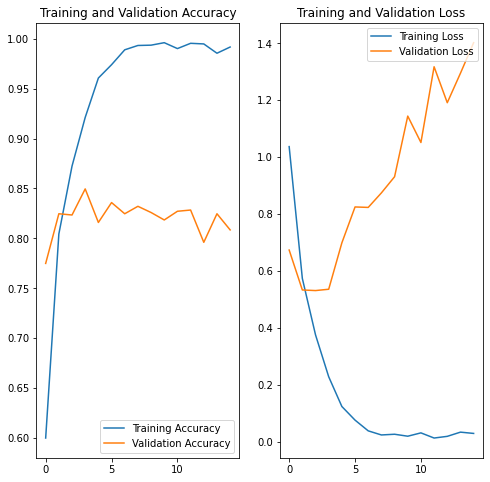

In [ ]:
def visualize_training_result():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

visualize_training_result()

In [ ]:
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
101/101 [==============================] - 98s 967ms/step - loss: 1.0371 - accuracy: 0.6000 - val_loss: 0.6741 - val_accuracy: 0.7749
Epoch 2/15
101/101 [==============================] - 97s 964ms/step - loss: 0.5744 - accuracy: 0.8043 - val_loss: 0.5339 - val_accuracy: 0.8246
Epoch 3/15
101/101 [==============================] - 98s 972ms/step - loss: 0.3764 - accuracy: 0.8724 - val_loss: 0.5318 - val_accuracy: 0.8234
Epoch 4/15
101/101 [==============================] - 98s 967ms/step - loss: 0.2294 - accuracy: 0.9211 - val_loss: 0.5365 - val_accuracy: 0.8495
Epoch 5/15
101/101 [==============================] - 98s 966ms/step - loss: 0.1249 - accuracy: 0.9606 - val_loss: 0.6993 - val_accuracy: 0.8159
Epoch 6/15
101/101 [==============================] - 98s 969ms/step - loss: 0.0771 - accuracy: 0.9739 - val_loss: 0.8253 - val_accuracy: 0.8358
Epoch 7/15
101/101 [==============================] - 98s 971ms/step - loss: 0.0394 - accuracy: 0.9888 - val_loss: 0.8237 - val_ac

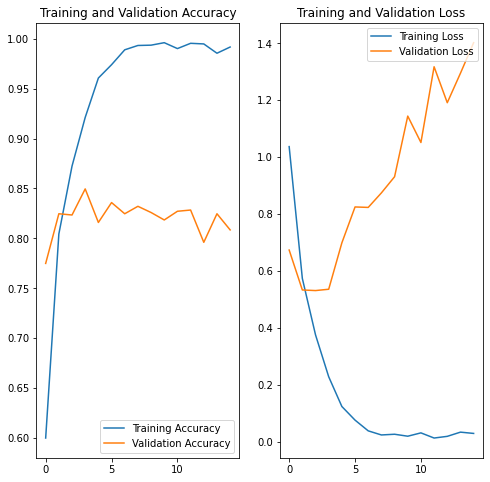

In [ ]:
visualize_training_result()

# Play a bit with data and model


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
101/101 [==============================] - 115s 1s/step - loss: 1.2097 - accuracy: 0.5217 - val_loss: 0.8095 - val_accuracy: 0.6903
Epoch 2/15
101/101 [==============================] - 115s 1s/step - loss: 0.8882 - accuracy: 0.6596 - val_loss: 0.7545 - val_accuracy: 0.7127
Epoch 3/15
101/101 [==============================] - 115s 1s/step - loss: 0.7449 - accuracy: 0.7273 - val_loss: 0.5870 - val_accuracy: 0.7960
Epoch 4/15
101/101 [==============================] - 115s 1s/step - loss: 0.6395 - accuracy: 0.7683 - val_loss: 0.5308 - val_accuracy: 0.8246
Epoch 5/15
101/101 [==============================] - 116s 1s/step - loss: 0.6252 - accuracy: 0.7786 - val_loss: 0.5188 - val_accuracy: 0.8147
Epoch 6/15
101/101 [==============================] - 115s 1s/step - loss: 0.5784 - accuracy: 0.7929 - val_loss: 0.5428 - val_accuracy: 0.8085
Epoch 7/15
101/101 [==============================] - 116s 1s/step - loss: 0.5298 - accuracy: 0.8130 - val_loss: 0.4331 - val_accuracy: 0.8458

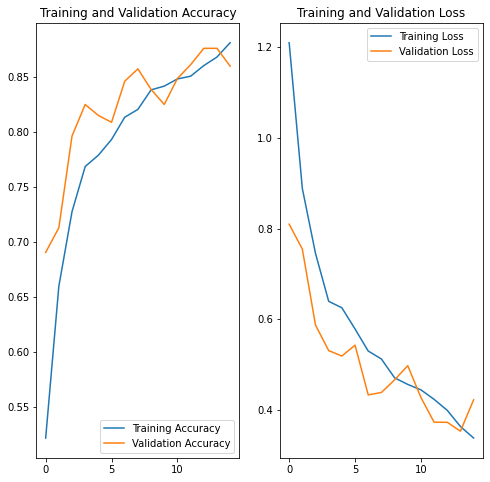

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the model

In [ ]:
!mkdir -p saved_model
model.save('saved_model/furniture-classification-model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/furniture-classification-model/assets


In [ ]:
!ls saved_model/furniture-classification-model

assets	saved_model.pb	variables


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/furniture-classification-model')
tflite_model = converter.convert()
open('furniture-classificatin-model.tflite', 'wb').write(tflite_model)

15962292

In [ ]:
class_names

['bed', 'chair', 'sofa', 'swivelchair', 'table']